# Multiple Regression

## Learning goals:

For a multivariable linear regression, students will be able to:

* compare and contrast with univariable linear regression
* write an example of the equation
* develop one with statsmodels 
* assess the model fit 
* validate the model


### Keyterms
- Multivariable
- Train-test split
- MSE: Mean squared error
- RSME: Root squared mean error


## Scenario

The University of San Paulo in Brazil is likes to party. We are a contracted beer supplier to the University and we want to make sure we have enough supply on hand. We are hoping to build a model that can predict beer consumption given other variables. 


![beer](pexels-photo-544988-small.jpeg)
More about the dataset can be found [here](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)


###  Prior Knowledge


Before looking at the dataset, what variables do we think might be in there? What might make a student drink more? 

#### Step 1:  Discussion 

- compare and contrast with univariable linear regression
- How is this different from the regression we've done before?
- Here, you'll explore how to perform linear regressions using multiple independent variables to better predict a target variable.

#### Step 2:  Develop a multivariable regression model with statsmodels 

**Load Libraries and load in data**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt

In [8]:
df_comma = pd.read_csv('Consumo_cerveja.csv', decimal=',', parse_dates=['Data'])
df_comma['Consumo de cerveja (litros)'] = pd.to_numeric(df_comma['Consumo de cerveja (litros)'])
df_comma.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaT,NaN,NaN,NaN,NaN,NaN,NaN
937,NaT,NaN,NaN,NaN,NaN,NaN,NaN
938,NaT,NaN,NaN,NaN,NaN,NaN,NaN
939,NaT,NaN,NaN,NaN,NaN,NaN,NaN
940,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = pd.read_csv('Consumo_cerveja.csv')

In [4]:
df.head(10)
# df.info()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


### Small Data Cleaning Tasks:
- Drop Date
- convert all the columns to numeric (replace ',' with '.')
- rename columns to be `name = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']`

In [9]:
# clean data here
df_comma.drop('Data', inplace=True, axis=1)
df_comma.columns = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']

In [10]:
df_comma.info()
df_comma.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
temp-median    365 non-null float64
temp-min       365 non-null float64
temp-max       365 non-null float64
rain           365 non-null float64
finals-week    365 non-null float64
target         365 non-null float64
dtypes: float64(6)
memory usage: 44.2 KB


,temp-median,temp-min,temp-max,rain,finals-week,target
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


**Check** for NaNs

In [ ]:
df.isna().sum()

In [13]:
df_comma.dropna(inplace=True)

In [14]:
df_comma.shape

(365, 6)

### Everyone write an example of an equation for our multiple regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

<img src="https://miro.medium.com/max/1400/1*d0icRnPHWjHSNXxuoYT5Vg.png" width=450 />

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

What would the formula be with real values?

**Send your equations to me via zoom or slack and I will paste them into the notebook**

Equations here

>

![statsmodels](https://www.statsmodels.org/stable/_static/statsmodels_hybi_banner.png)

Okay, now here's how you can use format and join to make the formula with **code**:

In [17]:
formula = 'target ~ {}'.format(' + '.join(df_comma.columns[:-1]))
formula

'target ~ temp-median + temp-min + temp-max + rain + finals-week'

In [19]:
model = sm.OLS(df_comma.target, df_comma.drop('target', axis=1)).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7620.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:28:12   Log-Likelihood:                -851.48
No. Observations:                 365   AIC:                             1713.
Df Residuals:                     360   BIC:                             1732.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp-median     0.1192      0.202      0.590      0.555      -0.278       0.516
temp-min        0.1146      0.117      0.977      0.329      -0.116       0.345
temp-max        0.7313      0.102      7.179      0.000       0.531       0.932
rain           -0.0552      0.011     -5.112      0.000      -0.076      -0.034
finals-week     5.4816      0.289     18.989      0.000       4.914       6.049
==============================================================================
Omnibus:                       20.752   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.729
Skew:                          -0.175   Prob(JB):                      0.00771
Kurtosis:                       2.281   Cond. No.                         85.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model = sm.OLS(df_comma['temp-max'], df_comma[['temp-median', 'temp-min']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               temp-max   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.801e+04
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:35:34   Log-Likelihood:                -613.36
No. Observations:                 365   AIC:                             1231.
Df Residuals:                     363   BIC:                             1239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp-median     1.8479      0.039     47.291      0.000       1.771       1.925
temp-min       -0.7235      0.047    -15.259      0.000      -0.817      -0.630
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.864
Skew:                           0.154   Prob(JB):                        0.394
Kurtosis:                       3.166   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

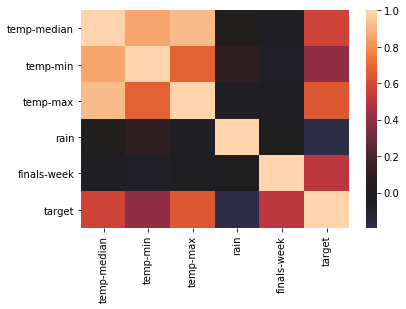

In [25]:
import seaborn as sns
sns.heatmap(df_comma.corr(), center=0)
plt.show()

### What's the actual multivariable  linear regression equation with the coefficients?

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

#### Step 3: Assess the model fit
Demonstrate and Apply:

**Discussion:**

In groups of 2 or 3 write a synopsis of the following summary

* What can you say about the coefficients?

* What do the p-values tell us?

* What does R^2 represent

* What other insights do you notice?





#### Step 4: Validate the model 
![scikit](https://cdn-images-1.medium.com/max/1200/1*-FHtcdQljtGKQGm77uDIyQ.png)
- Build LinReg Model with Scikit-Learn
- Check some of the linear regression assumptions


In [26]:
linreg = LinearRegression()

In [28]:
X = df_comma.drop("target", axis=1)
y = df_comma.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
# use fit to form model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# gives you r squared of the model
linreg.score(X_test, y_test)

0.6801883455684188

`score` here returns the R^2. 

How does it differ from when you use the whole dataset?

### Integration:

Repeat this process for concrete mixture. the documentation can be found [here](http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)
![test](building-construction-building-site-constructing-small.jpg)

In [ ]:
df2 = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [ ]:
df2.head()
df2.info()

### Assessment

### Reflection

### Resources

Resources
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

Full code implementation of Linear Regression
Full code — https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation

Multiple regression explained
https://www.statisticssolutions.com/what-is-multiple-linear-regression/
